In [ ]:
print("Hello World")

Hello World


In [4]:
import pandas as pd

sheet_id = "1qW7c5rqbGDHSLuWk6RetPdz4QxPN3zXZgRz3LZA9xt4"
gid = "0"  # 如果切换到别的sheet，改成对应的gid即可
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"

# 读取数据
df = pd.read_csv(url)
print(df.shape)
display(df.head())

# 如果你的表里有“date”这一列，想把它当日期用：
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    display(df.dtypes)


(10, 3)


,date,category,amount
0,2025-01-01,退款,12.3
1,2025-01-01,发货,5.0
2,2025-01-02,质量,8.8
3,2025-01-03,账号,3.5
4,2025-01-03,退款,7.2


,0
date,datetime64[ns]
category,object
amount,float64


In [6]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1qW7c5rqbGDHSLuWk6RetPdz4QxPN3zXZgRz3LZA9xt4/export?format=csv&gid=0"

for enc in ["utf-8", "utf-8-sig", "gb18030", "gbk", "big5"]:
    try:
        df = pd.read_csv(url, encoding=enc)
        print("✅ 编码正常：", enc, "  预览：")
        display(df.head(3))
        break
    except UnicodeDecodeError:
        print("❌ 不行：", enc)


✅ 编码正常： utf-8   预览：


,date,category,amount
0,2025-01-01,退款,12.3
1,2025-01-01,发货,5.0
2,2025-01-02,质量,8.8


In [18]:
!apt-get -qq update
!apt-get -qq install -y fonts-noto-cjk fonts-wqy-zenhei


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-wqy-zenhei.
(Reading database ... 126736 files and directories currently installed.)
Preparing to unpack .../fonts-wqy-zenhei_0.9.45-8_all.deb ...
Unpacking fonts-wqy-zenhei (0.9.45-8) ...
Setting up fonts-wqy-zenhei (0.9.45-8) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [21]:
import matplotlib as mpl
import matplotlib.font_manager as fm

# 刷新字体缓存（关键步）
try:
    fm._load_fontmanager(try_read_cache=False)
except Exception as e:
    print("字体缓存刷新提示：", e)

candidates = [
    "Noto Sans CJK SC", "Noto Sans CJK JP", "Noto Sans CJK KR", "Noto Sans CJK TC",
    "WenQuanYi Zen Hei", "Noto Serif CJK SC"
]
installed = {f.name for f in fm.fontManager.ttflist}
chosen = next((name for name in candidates if name in installed), None)
print("可用中文字体候选是否安装：", [name for name in candidates if name in installed])
print("最终使用字体：", chosen)

mpl.rcParams["font.family"] = chosen or "DejaVu Sans"  # 至少保证可运行
mpl.rcParams["axes.unicode_minus"] = False  # 负号不乱码


可用中文字体候选是否安装： []
最终使用字体： None


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  fig.canvas

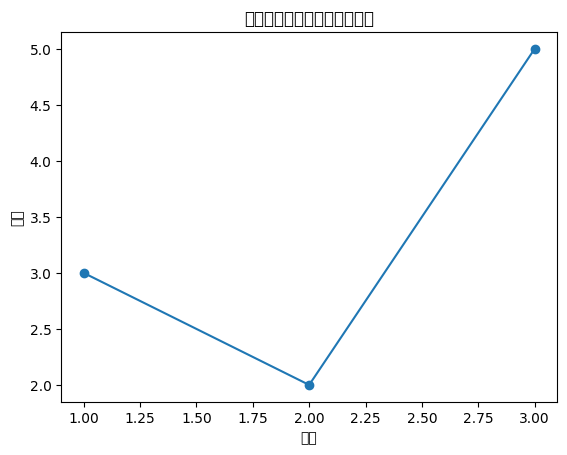

In [22]:
import matplotlib.pyplot as plt
plt.title("各类别金额汇总（测试中文）")
plt.xlabel("类别")
plt.ylabel("金额")
plt.plot([1,2,3], [3,2,5], marker="o")
plt.show()


In [24]:
!apt-get -qq update
!apt-get -qq install -y fonts-noto-cjk fonts-wqy-zenhei
!rm -rf ~/.cache/matplotlib


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [25]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 依次尝试常见字体文件路径，找到就用
candidates = [
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
    "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc",
    "/usr/share/fonts/truetype/noto/NotoSerifCJK-Regular.ttc",
    "/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc",
]
font_path = next((p for p in candidates if os.path.exists(p)), None)
assert font_path, "没找到中文字体文件；运行 `!fc-list :lang=zh` 把输出发我"

# 注册并设为默认
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False  # 负号不乱码
print("✅ 正在使用中文字体：", font_name, " @ ", font_path)


✅ 正在使用中文字体： Noto Sans CJK JP  @  /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc


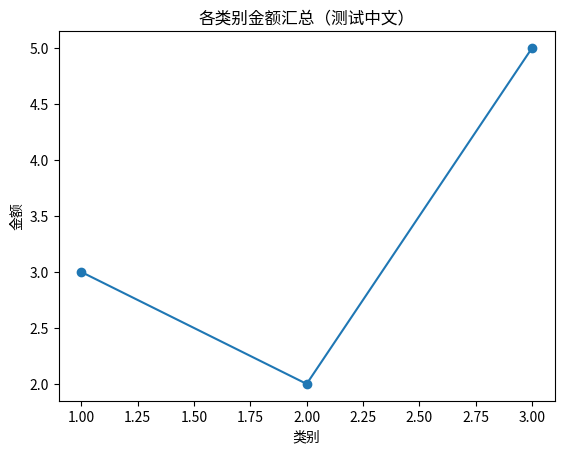

In [26]:
plt.figure()
plt.title("各类别金额汇总（测试中文）")
plt.xlabel("类别")
plt.ylabel("金额")
plt.plot([1,2,3], [3,2,5], marker="o")
plt.show()


形状: (10, 3)


,date,category,amount
0,2025-01-01,退款,12.3
1,2025-01-01,发货,5.0
2,2025-01-02,质量,8.8
3,2025-01-03,账号,3.5
4,2025-01-03,退款,7.2


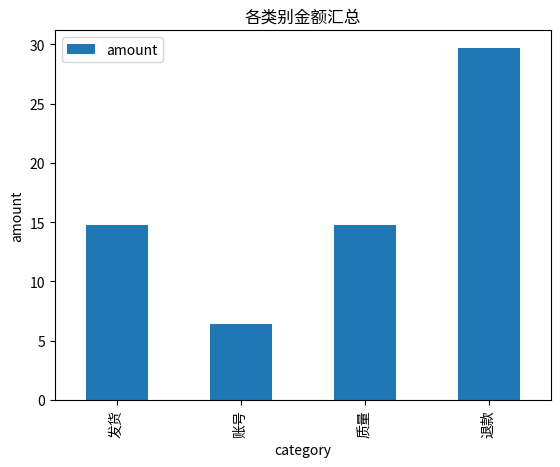

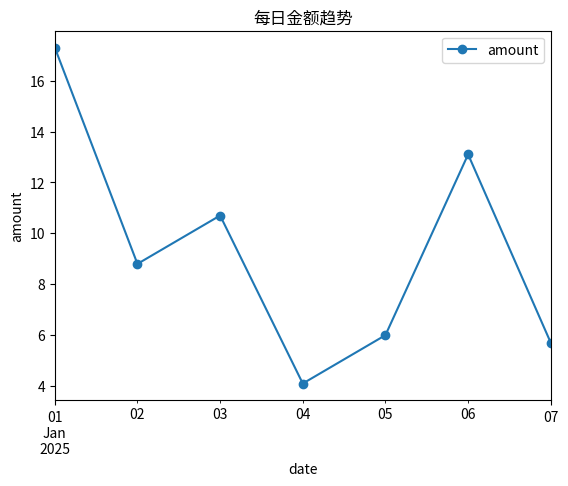

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 读取数据
df = pd.read_csv('/content/sample.csv', parse_dates=['date'])
print("形状:", df.shape)
display(df.head())

# 2) 基础清洗：去重 + 缺失值处理
df = df.drop_duplicates()
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna('')
    else:
        df[c] = df[c].fillna(df[c].median())

# 3) 图表一：按类别汇总金额（柱状图）
by_cat = df.groupby('category', as_index=False)['amount'].sum()
ax = by_cat.plot(kind='bar', x='category', y='amount', title='各类别金额汇总')
ax.set_xlabel('category'); ax.set_ylabel('amount')
plt.show()

# 4) 图表二：按日期汇总金额（折线图）
by_day = df.groupby('date', as_index=False)['amount'].sum()
ax = by_day.plot(kind='line', x='date', y='amount', marker='o', title='每日金额趋势')
ax.set_xlabel('date'); ax.set_ylabel('amount')
plt.show()


1.今天在学习的过程中最大的问题是中文语言显示乱码的问题。
在GPT的帮助下重新安装和设定了中文就可以解决了。